Analysis of the World Happiness Report 2021
===
**Varun Ayyappan**

Outline
---
1. Introduction
    1. About the Report
    2. Purpose
    3. Hypothesis
2. Data Collection and Processing
    1. Imports
    2. Load the data
    3. Prepare the Main Data Set
    4. Prepare the 2021 Data Set
    5. Concatenate the data sets together.
3. Exploratory Data Analysis
    1. Summary Statistics
    2. Violin Plots
    3. Heat Map
4. Creating a Model
    1. Missing Data
    2. Split the Data Set
    3. Linear Regression Model
    4. Random Forest Regressor Model
5. Conclusion

Introduction
---

### About the Report
The World Happiness Report is an annual publication by the [Sustainable Development Solutions Network](https://www.unsdsn.org/) (SDSN) of the United Nations. The project seeks to measure the happiness of the people from various nations araound the world by aggraegating several ecenomic and social factors. The United Nations commisioned these reports in order to create a more holistic definition of uplifting and developing a nation then traditional indices such as the [Human Development Index](http://hdr.undp.org/en/content/human-development-index-hdi) or [Gross Domestic Product](https://www.imf.org/external/pubs/ft/fandd/basics/gdp.htm). As of publishing this tutorial, the current release of the report is the 2021 edition which can be found [here](https://worldhappiness.report/ed/2021/).

### Purpose
The purpose of this turorial is to figure out what are the top factors which contribute to a population's happiness. Once these metrics are isolated, the next inquiry is if a nation's happiness can be predicted by those factors. 

### Hypothesis
I predict that GDP per captia will be the strongest predictor of happiness. I beleive this because a strong economic position will make the other factors possible. I also beleive that I will be able to create an accurate model that can predict a country's happiness based on the factors given in the data set.

Data Collection and Processing
---
The World Happiness Report publishes the data sets used in their analysis as Excel files on their website. The main set we will focus on is this [one](https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls), which includes all of the data gathered by the SDSN for prior editions of the report. In addition, we will add the data in this [file](https://happiness-report.s3.amazonaws.com/2021/DataForFigure2.1WHR2021C2.xls), because it includes the World Happiness Report data for 2021. We will retrieve, prepare, and combine these two data sets in this section of the tutorial.

### Imports
We will utilize the [Pandas](https://pandas.pydata.org/docs/reference/), [Numpy](https://numpy.org/doc/), [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/), [SciPy](https://scipy.org/), and [Scikit-learn](https://scikit-learn.org/stable/) Python libraries in order to manipulate and visualize the data. 

In [1]:
# Import all of the project pre-requisites
import pandas as pd
import numpy as np
import seaborn as sb
import scipy as sp
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
%matplotlib inline

### Load the data
Pandas can read in the data from Excel file and automatically populate a new dataframe with the `read_excel` method.

In [2]:
# Read in data from the two Excel files into dataframes
main_data = pd.read_excel('../data/DataPanelWHR2021C2.xls', sheet_name = 'Sheet1')
fig_data = pd.read_excel('../data/DataForFigure2.1WHR2021C2.xls', sheet_name = 'Sheet1')

### Prepare the Main Data Set
We need to prepare the first data set for aggreagation by makeing it match the format of the seocond data set. We will do this by adding the regional indicator column as it is a useful quality to group enteries by when we analyze the data in later sections of the tutorial. We will also drop any columns not found in the 2021 file.

In [3]:
# Rename the year column
main_data.rename(columns = {'year':'Year'}, inplace = True)

# Extract the reigonal indicator column from figure data excel file
region = pd.DataFrame(fig_data[["Country name","Regional indicator"]])  # extracting region information

# Merge the reigonal indicator column into the main data set
main_data = main_data.merge(region, on='Country name', how='left') # inserting region indicator column
col = list(main_data)
col.insert(1,col.pop(col.index('Regional indicator')))
main_data = main_data.loc[:,col]
main_data['Regional indicator'].fillna("None", inplace=True)

# Drop extra columns
main_data.pop('Positive affect')
main_data.pop('Negative affect')

0       0.258195
1       0.237092
2       0.275324
3       0.267175
4       0.267919
          ...   
1944    0.208555
1945    0.224051
1946    0.211726
1947    0.235354
1948    0.345736
Name: Negative affect, Length: 1949, dtype: float64

### Prepare the 2021 Data Set
We need to prepare the second data set for aggreagation by makeing it match the format of the first data set. We will accomplish this by removing columns not found in the main data set and renaming columns with different names. We will also add a year column where every entry is labled as 2021.

In [4]:
# Select the columns for the 2021 data that are shared with the main one
fig_data = fig_data[['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# Rename columns so they match between datasets
fig_data.rename(columns = {'Ladder score':'Life Ladder', 'Logged GDP per capita':'Log GDP per capita', 'Healthy life expectancy':'Healthy life expectancy at birth'}, inplace = True)

# Insert year column with every entry labled as 2021
fig_data['Year'] = pd.Series([2021 for x in range(len(fig_data.index))])

### Concatenate the data sets together.
The `concat` method will allow us to combine the two data sets together. Then we will sort the data by country name and year with the `sort_values` method.

In [5]:
# Concatenate the two data sets together
data = pd.concat([main_data, fig_data])

# Concatenate the two data sets together
data.sort_values(['Country name', 'Year'], ascending = True, inplace=True)

# Reset indices
data.reset_index(drop=True, inplace=True)

# Print the first 100 enteries of the data frame
data.head(100)

Country name Regional indicator  Year  Life Ladder  Log GDP per capita  \
0   Afghanistan         South Asia  2008     3.723590            7.370100   
1   Afghanistan         South Asia  2009     4.401778            7.539972   
2   Afghanistan         South Asia  2010     4.758381            7.646709   
3   Afghanistan         South Asia  2011     3.831719            7.619532   
4   Afghanistan         South Asia  2012     3.782938            7.705479   
..          ...                ...   ...          ...                 ...   
95      Austria     Western Europe  2017     7.293728           10.908466   
96      Austria     Western Europe  2018     7.396002           10.927505   
97      Austria     Western Europe  2019     7.195361           10.939381   
98      Austria     Western Europe  2020     7.213489           10.851118   
99      Austria     Western Europe  2021     7.267800           10.906316   

    Social support  Healthy life expectancy at birth  \
0         0.450662                         50.799999   
1         0.552308                         51.200001   
2         0.539075                         51.599998   
3         0.521104                         51.919998   
4         0.520637                         52.240002   
..             ...                               ...   
95        0.906218                         72.699997   
96        0.911668                         73.000000   
97        0.964489                         73.300003   
98        0.924831                         73.599998   
99        0.934176                         73.299721   

    Freedom to make life choices  Generosity  Perceptions of corruption  
0                       0.718114    0.167640                   0.881686  
1                       0.678896    0.190099                   0.850035  
2                       0.600127    0.120590                   0.706766  
3                       0.495901    0.162427                   0.731109  
4                       0.530935    0.236032                   0.775620  
..                           ...         ...                        ...  
95                      0.890031    0.133064                   0.518304  
96                      0.904112    0.053470                   0.523061  
97                      0.903428    0.059686                   0.457089  
98                      0.911910    0.011032                   0.463830  
99                      0.907691    0.041568                   0.481378  

[100 rows x 10 columns]

Exploratory Data Analysis
---
After collecting and cleaning the data, the next step is use summary statistics and visual representatons to understand the contents and the characteristics of the data set. By employing these techniques, we should be able to spot patterns and relationships in the data that are hard to distinguish by just looking at the raw numbers.

### Summary Statistics
Here is the summary statistics for each variable in the dataframe. We will describe the distribution of the data with the mean as the center, standard deviation for spread, and a five number sumamry for the shape.

In [6]:
data.describe() #Check the Summary Statistics 

Year  Life Ladder  Log GDP per capita  Social support  \
count  2098.000000  2098.000000         2062.000000     2085.000000   
mean   2013.768827     5.471403            9.373065        0.812709   
std       4.486449     1.112682            1.154252        0.118202   
min    2005.000000     2.375092            6.635322        0.290184   
25%    2010.000000     4.652504            8.470213        0.749633   
50%    2014.000000     5.391887            9.462173        0.834716   
75%    2018.000000     6.282982           10.360714        0.905290   
max    2021.000000     8.018934           11.648169        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2043.000000                   2066.000000   
mean                          63.478503                      0.746101   
std                            7.468781                      0.140774   
min                           32.299999                      0.257534   
25%                           58.704500                      0.652307   
50%                           65.279999                      0.766931   
75%                           68.660004                      0.859147   
max                           77.099998                      0.985178   

        Generosity  Perceptions of corruption  
count  2009.000000                1988.000000  
mean     -0.001023                   0.745639  
std       0.161405                   0.186267  
min      -0.335040                   0.035198  
25%      -0.115171                   0.688764  
50%      -0.026638                   0.800729  
75%       0.089205                   0.869042  
max       0.698099                   0.983276

### Violin Plot
A violin plot is a versitile data visualization tool that displays the 5 number summary that is featured in a box plot as well as a representation of the distribution of data with the shape of the violins.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2010'),
  Text(6, 0, '2011'),
  Text(7, 0, '2012'),
  Text(8, 0, '2013'),
  Text(9, 0, '2014'),
  Text(10, 0, '2015'),
  Text(11, 0, '2016'),
  Text(12, 0, '2017'),
  Text(13, 0, '2018'),
  Text(14, 0, '2019'),
  Text(15, 0, '2020'),
  Text(16, 0, '2021')])

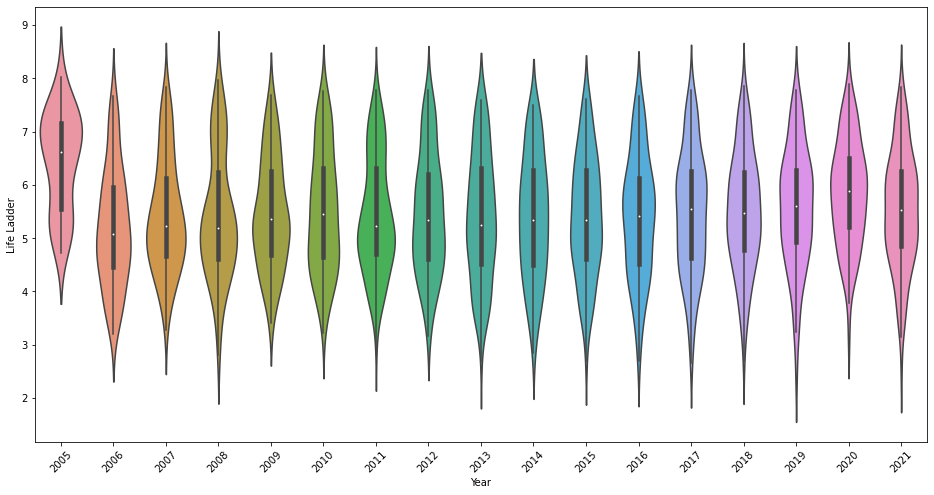

In [7]:
# Violin Plot of Life Ladder distibutions by Year
fig, axes = plt.subplots(figsize = (16, 8))
plot = sb.violinplot(x="Year", y="Life Ladder", data=data, ax = axes)
plt.xticks(rotation=45)

The above plot shows us the distribtution of Life Ladder scores for each year between the years of 2005 and 2021. With the exception of the first year, the distribution of the scores remain very similar.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'South Asia'),
  Text(1, 0, 'Central and Eastern Europe'),
  Text(2, 0, 'Middle East and North Africa'),
  Text(3, 0, 'None'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Commonwealth of Independent States'),
  Text(6, 0, 'North America and ANZ'),
  Text(7, 0, 'Western Europe'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southeast Asia'),
  Text(10, 0, 'East Asia')])

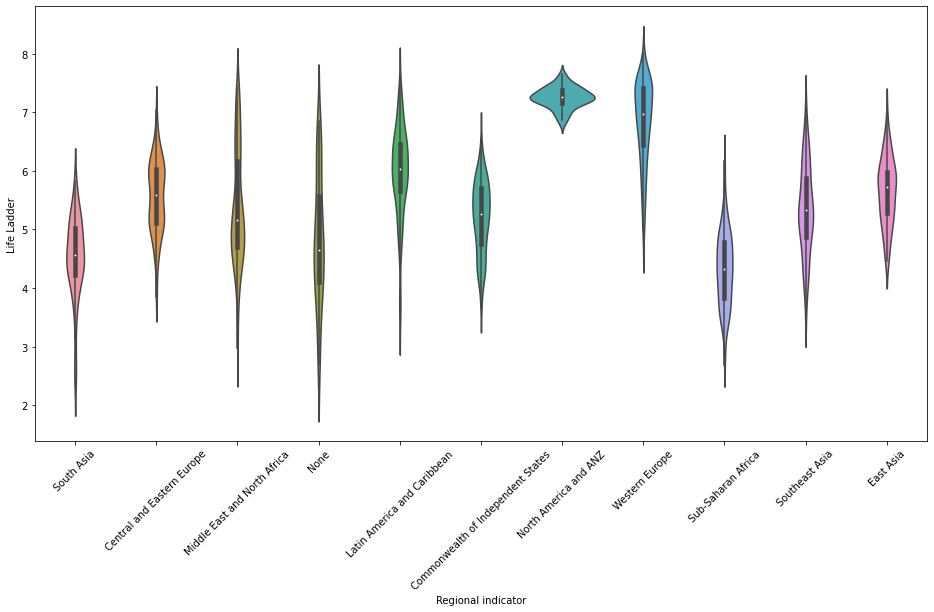

In [8]:
# Violin Plot of Life Ladder distibutions by Region
fig, axes = plt.subplots(figsize = (16, 8))
plot = sb.violinplot(x="Regional indicator", y="Life Ladder", data=data, ax = axes)
plt.xticks(rotation=45)

The distribution of Life Ladder scores vary widely between different regions of the world. More wealthy areas such as North America and AZN (Australia and New Zealand) as well as Western Europe have distributions concentrated at the upper end of the happiness scale. Poorer regions such as Sub-Saharan Africa and South Asia have distributions in the lower half of the scale.

### Distributions of Variables
We will be using histograms to visualize the distribution of the rest of variables in the data set. Each variable will have it's own plot, but to make it easier to compare and contrast, I will have all of the histograms on the same image.

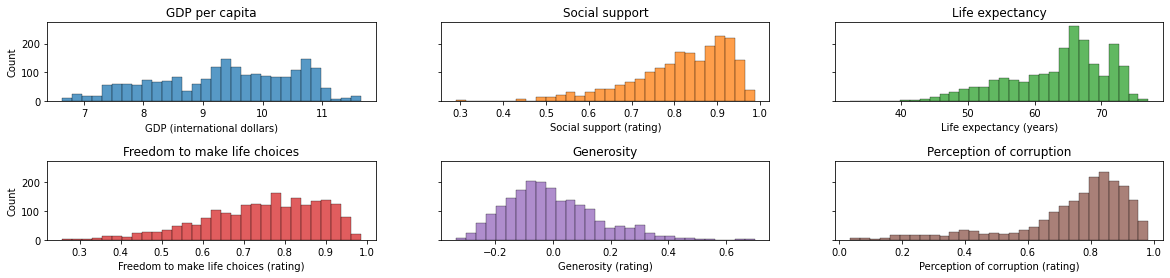

In [9]:
# Set up the subplot for all of the histograms
palette = sb.color_palette('tab10'); 
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharey=True)
plt.subplots_adjust(hspace=0.75)
sb.set_palette("flare")

# GDP histogram
sb.histplot(data['Log GDP per capita'], ax=ax1, kde=False, bins=30, color=palette[0])
ax1.set_title('GDP per capita')
ax1.set_xlabel('GDP (international dollars)')

# Social Support histogram
sb.histplot(data['Social support'],ax=ax2, kde=False, bins=30, color=palette[1])
ax2.set_title('Social support')
ax2.set_xlabel('Social support (rating)')

# Life expectancy histogram
sb.histplot(data['Healthy life expectancy at birth'],ax=ax3, kde=False, bins=30, color=palette[2])
ax3.set_title('Life expectancy')
ax3.set_xlabel('Life expectancy (years)')

# Life choices histogram
sb.histplot(data['Freedom to make life choices'],ax=ax4, kde=False, bins=30, color=palette[3])
ax4.set_title('Freedom to make life choices')
ax4.set_xlabel('Freedom to make life choices (rating)')

# Generosity histogram
sb.histplot(data['Generosity'], ax=ax5, kde=False, bins=30, color=palette[4])
ax5.set_title('Generosity')
ax5.set_xlabel('Generosity (rating)')

# Corruption histogram
sb.histplot(data['Perceptions of corruption'], ax=ax6, kde=False, bins=30, color=palette[5])
ax6.set_title('Perception of corruption')
ax6.set_xlabel('Perception of corruption (rating)')

fig.set_figwidth(20)

Here are some observations for each histogram:

1. The distribution for GDP per captia is fairly normally distributed. It appears to be centered in the 9 to 10 dollars bin and a range of about 5 dollars.
2. The distribution for social support appears to be skewed to the left. The center is around 0.8 to 0.9 rating bin and is variable with a range of around 0.7.
3. The distribution for average life expectancy is skewed to the left. It is centered in the 65 to 70 bin and has a range of 40 years.
4. The distribution for freedom of life choices appears to be skewed to the left. It appears to be centered around 0.7 to 0.8 rating bin and is variable with a range of around 0.7.
5. The generosity distribution is skewed to the right, has a center of -0.1 to 0.1 rating bin, and has a range of 0.8.
6. The corruption perception distribution is skewed to the right with a center of 0.7 to 0.9 rating bin and a range of 0.9.

### Heat Map
Next, we will plot the correlations between the variables on a heat map in order to determine how the features relate to each other.

<AxesSubplot:>

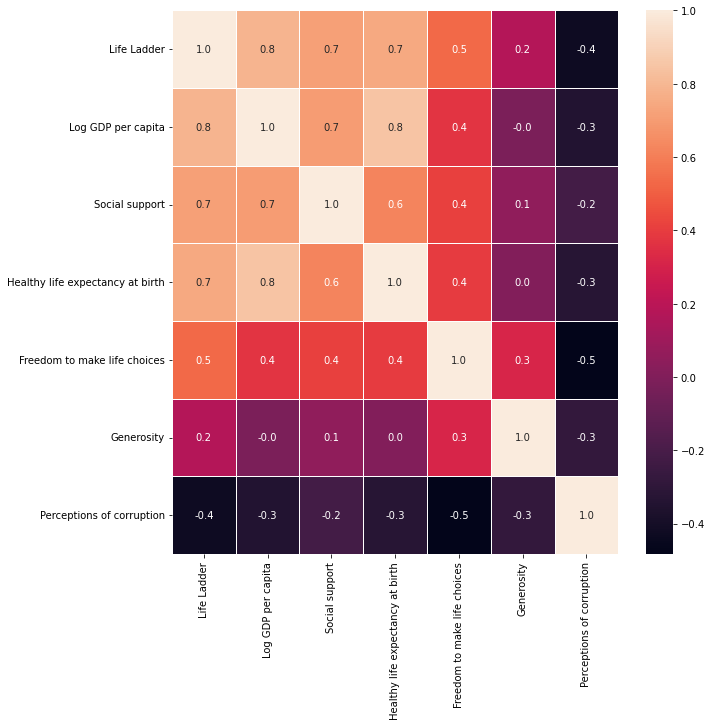

In [10]:
# Heatmap with all numeric factors other then Year
data_c = data.drop(['Year'],axis=1)
f,ax = plt.subplots(figsize=(10, 10))
sb.heatmap(data_c.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

From the correlation heat map, we can see that GDP per captia, social support, and life expectancy all have strong positive correlations with each other. The freedom to make life choices rating has a weak positive correlation with the previous factors. Generosity has little to no correlation with any of the factors. Corruption has a weak negative correlation with all factors previously mentioned.

Creating a Model
---



### Missing Data
Let us print the number of entries for each column to see how much data is missing form our data set.

In [11]:
# Print the number of enteries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2098 non-null   object 
 1   Regional indicator                2098 non-null   object 
 2   Year                              2098 non-null   int64  
 3   Life Ladder                       2098 non-null   float64
 4   Log GDP per capita                2062 non-null   float64
 5   Social support                    2085 non-null   float64
 6   Healthy life expectancy at birth  2043 non-null   float64
 7   Freedom to make life choices      2066 non-null   float64
 8   Generosity                        2009 non-null   float64
 9   Perceptions of corruption         1988 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 164.0+ KB


We can see above that there are 2098 enteries in the dataframe, and that 6 of our factors do not have data for all of them. This will the hurt the accuracy when building a model, so we will use the `interpolate` method to fill in missing data with estimated values.

In [12]:
# Fill in the missing data values with interpolation
data_pred = data.interpolate(method = 'linear')
data_pred

Country name  Regional indicator  Year  Life Ladder  Log GDP per capita  \
0     Afghanistan          South Asia  2008     3.723590            7.370100   
1     Afghanistan          South Asia  2009     4.401778            7.539972   
2     Afghanistan          South Asia  2010     4.758381            7.646709   
3     Afghanistan          South Asia  2011     3.831719            7.619532   
4     Afghanistan          South Asia  2012     3.782938            7.705479   
...           ...                 ...   ...          ...                 ...   
2093     Zimbabwe  Sub-Saharan Africa  2017     3.638300            8.015738   
2094     Zimbabwe  Sub-Saharan Africa  2018     3.616480            8.048798   
2095     Zimbabwe  Sub-Saharan Africa  2019     2.693523            7.950132   
2096     Zimbabwe  Sub-Saharan Africa  2020     3.159802            7.828757   
2097     Zimbabwe  Sub-Saharan Africa  2021     3.144800            7.942595   

      Social support  Healthy life expectancy at birth  \
0           0.450662                         50.799999   
1           0.552308                         51.200001   
2           0.539075                         51.599998   
3           0.521104                         51.919998   
4           0.520637                         52.240002   
...              ...                               ...   
2093        0.754147                         55.000000   
2094        0.775388                         55.599998   
2095        0.759162                         56.200001   
2096        0.717243                         56.799999   
2097        0.750470                         56.200840   

      Freedom to make life choices  Generosity  Perceptions of corruption  
0                         0.718114    0.167640                   0.881686  
1                         0.678896    0.190099                   0.850035  
2                         0.600127    0.120590                   0.706766  
3                         0.495901    0.162427                   0.731109  
4                         0.530935    0.236032                   0.775620  
...                            ...         ...                        ...  
2093                      0.752826   -0.097645                   0.751208  
2094                      0.762675   -0.068427                   0.844209  
2095                      0.631908   -0.063791                   0.830652  
2096                      0.643303   -0.008696                   0.788523  
2097                      0.676700   -0.047346                   0.820999  

[2098 rows x 10 columns]

We should now have a completly full dataframe and we will confirm this by printing out the data count again.

In [13]:
# Print the number of enteries
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2098 non-null   object 
 1   Regional indicator                2098 non-null   object 
 2   Year                              2098 non-null   int64  
 3   Life Ladder                       2098 non-null   float64
 4   Log GDP per capita                2098 non-null   float64
 5   Social support                    2098 non-null   float64
 6   Healthy life expectancy at birth  2098 non-null   float64
 7   Freedom to make life choices      2098 non-null   float64
 8   Generosity                        2098 non-null   float64
 9   Perceptions of corruption         2098 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 164.0+ KB


### Split the Data Set
We need to split our data set into 4 sets. First we will have sepearate the Life Ladder score into the Y subset as that is what we will be predicting with our regression model. The variables that is used to calculate the score is our X subset. Then we will split both the X and y sets into training and testing subsections.

In [14]:
# Drop variables that are not used to calcualte Life Ladder score
data_comp = data_pred.drop(['Year','Country name','Regional indicator'],axis = 1).reset_index()

# Reset index
data_comp.drop(['index'], axis = 1, inplace=True)

# Split dataframe into X and y
y = pd.DataFrame(data_comp['Life Ladder'])
X = data_comp.drop(['Life Ladder'], axis = 1)

# Split data into training and testing sections
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Print out the size and dimensions of each of the subsets
print("X_Train Set :", X_train.shape)
print("y_Train Set :", y_train.shape)
print("X_Test Set  :", X_test.shape)
print("y_Test Set  :", y_test.shape)

X_Train Set : (1678, 6)
y_Train Set : (1678, 1)
X_Test Set  : (420, 6)
y_Test Set  : (420, 1)


### Linear Regression Model 
Now it is time to create a linear regression model. Lets train the model with the data we have prepared earlier.

In [15]:
# Build a Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train, y_train)    # Train the model with train data
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-2.15239539]
Coefficients of Regression 	: a =  [[ 0.34513148  2.56207818  0.02940019  1.08481351  0.68702761 -0.5015454 ]]



Predictors  Coefficients
0                Log GDP per capita      0.345131
1                    Social support      2.562078
2  Healthy life expectancy at birth      0.029400
3      Freedom to make life choices      1.084814
4                        Generosity      0.687028
5         Perceptions of corruption     -0.501545

With the model trained, we can see that these coefficients are surprising as they don't line up with my hypothesis. Lets see how well the model can create predictions! We can test the regression model with our testing subset of the data and plot out predicted versus expected results.

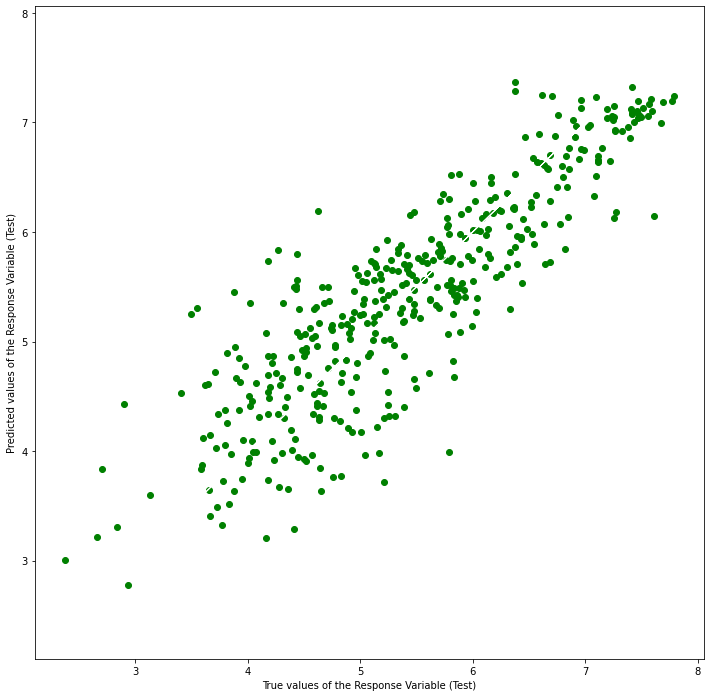

Score of model (R^2) 	: 0.7530544582863108
Error of prediction (MSE) 	: 0.30834447158534783
Accuracy of prediction 	: 0.7530544582863108



In [16]:
# Predict with testing data
y_test_pred_L = linreg.predict(X_test)

# Plot actual vs predicted values
f, axes = plt.subplots(1, 1, figsize=(12, 12))
plt.scatter(y_test, y_test_pred_L, color = "green")
plt.plot(y_test, y_test, 'w-', linewidth = 1)
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Pirnt out model performance stats
print("Score of model (R^2) \t:", linreg.score(X_test, y_test))
print("Error of prediction (MSE) \t:", mean_squared_error(y_test, y_test_pred_L))
print("Accuracy of prediction \t:", metrics.r2_score(y_test, y_test_pred_L))    # how well the model actually did on the test set
print()

With an accuracy score of 75.30%, this model can make decently accurate preictions. But we can do better.

### Random Forest Regressor Model
Now lets create a random forest regressor model to make even more accurate predictions than our linear regression model.

In [17]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train.values.ravel())

RandomForestRegressor()

Let us test this new model in the same way we tested the linear one.

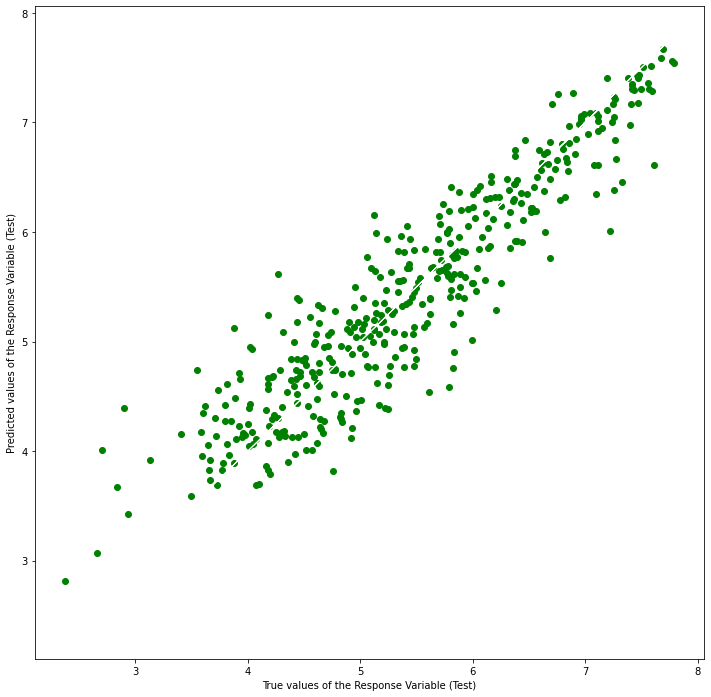

Score of model (R^2) 	: 0.8563945734682228
Error of prediction (MSE) 	: 0.17931054374760852
Accuracy of prediction 	: 0.8563945734682228



In [18]:
y_test_pred_R = rfr.predict(X_test)

f, axes = plt.subplots(1, 1, figsize=(12, 12))
plt.scatter(y_test, y_test_pred_R, color = "green")
plt.plot(y_test, y_test, 'w-', linewidth = 1)
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Score of model (R^2) \t:", rfr.score(X_test, y_test))
print("Error of prediction (MSE) \t:", mean_squared_error(y_test, y_test_pred_R))
print("Accuracy of prediction \t:", metrics.r2_score(y_test, y_test_pred_R))    # how well the model actually did on the test set
print()

With an accuracy score of 85.64%, I am happy with the results of the random forest regressor model. It is a significant improvement over the linear regression model's 75.30% accuracy.

Conclusion
---


In this tutorial, we went through each and every step of the data inquiry process. We were able to load our data from csv files and clean it for analysis. We explored our data using statistics and visualizations to further our understanding of the data. We finished our inquiry by building models that can accurately predict the happiness score of a nation given six of their performance metrics.

In my hypothesis, I predicted that GDP will be the single greatest preictor of a country's happiness. While it is true that GDP is a significant factor, two other factors that might be even more important are the freedom to make life choices and the social support scores. I also predicted that we will be able to create an accurate model to predict the happiness scores of the people, and we were able to do just that with our random forest regressor model.

The results of this inquiry have been insightful and have furthered my understanding of what we should focus on when we try to create a better and productive soceity. But there is still a lot to learn, and more explorations such as this one are neccessary in all kinds of problems that face the world. Hopefully you are now ready to tackle these challenges with your new found data science skills!